In [2]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import StandardScaler
SS=StandardScaler()
from sklearn.preprocessing import *
# from sklearn 
import importlib.util
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
# for error calculation MSE or MAE or Rsquare
from sklearn.metrics import *
# for spllititing the data_set
from sklearn.model_selection import train_test_split
# For support support vector regression
from sklearn.svm import SVR
# for time execution calculation
from datetime import datetime
from sklearn.model_selection import learning_curve, train_test_split
from sklearn.preprocessing import OneHotEncoder, label_binarize
from sklearn.model_selection import validation_curve

/home/admin1/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [3]:
spec = importlib.util.spec_from_file_location("DataPreprocessing", "/home/admin1/PycharmProjects/Machine_learning_Python/Utility/DataPreprocessing.py")
#At home windows
# spec = importlib.util.spec_from_file_location("DataPreprocessing", "C:/Users/PRAYAS/PycharmProjects/Machine_Learning_Python/Utility/DataPreprocessing.py")
# C:\Users\PRAYAS\PycharmProjects\Machine_Learning_Python\Utility
foo = importlib.util.module_from_spec(spec)
spec.loader.exec_module(foo)
preprocess_obj = foo.DataPreprocessing()


Data PreProcessign object created successfully


In [4]:
dataframe = pd.read_csv('Data/bike_sharing.csv')

In [5]:
dataframe.sample()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
8771,8772,2012-01-06,1,1,1,7,0,5,1,2,0.24,0.2879,0.65,0.0,4,201,205


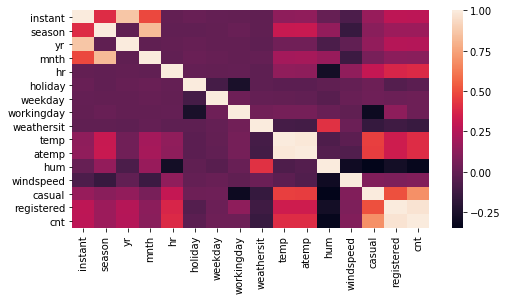

In [6]:
fig, ax = plt.subplots(figsize=(8,4))
sns.heatmap(dataframe.corr())

In [7]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
instant       17379 non-null int64
dteday        17379 non-null object
season        17379 non-null int64
yr            17379 non-null int64
mnth          17379 non-null int64
hr            17379 non-null int64
holiday       17379 non-null int64
weekday       17379 non-null int64
workingday    17379 non-null int64
weathersit    17379 non-null int64
temp          17379 non-null float64
atemp         17379 non-null float64
hum           17379 non-null float64
windspeed     17379 non-null float64
casual        17379 non-null int64
registered    17379 non-null int64
cnt           17379 non-null int64
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [8]:
dataframe['dteday'].nunique()

731

In [9]:
dataframe=dataframe.drop(['hum','dteday'],axis=1)

In [10]:
dataframe.isna().sum()

instant       0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

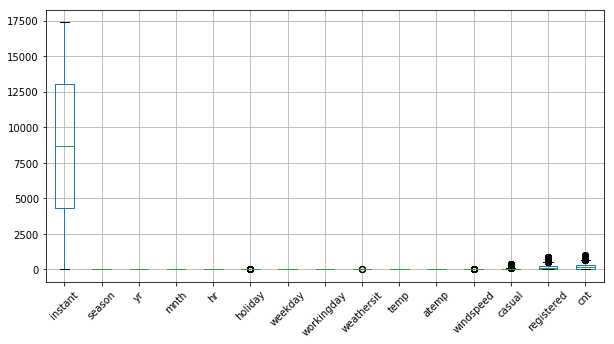

In [11]:
plt.figure(figsize=(10,5))
dataframe.boxplot(rot=45)

In [12]:
# trial without removing outliers

In [13]:
dataframe.head()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,windspeed,casual,registered,cnt
0,1,1,0,1,0,0,6,0,1,0.24,0.2879,0.0,3,13,16
1,2,1,0,1,1,0,6,0,1,0.22,0.2727,0.0,8,32,40
2,3,1,0,1,2,0,6,0,1,0.22,0.2727,0.0,5,27,32
3,4,1,0,1,3,0,6,0,1,0.24,0.2879,0.0,3,10,13
4,5,1,0,1,4,0,6,0,1,0.24,0.2879,0.0,0,1,1


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f31521b1d30>,
      dtype=object)

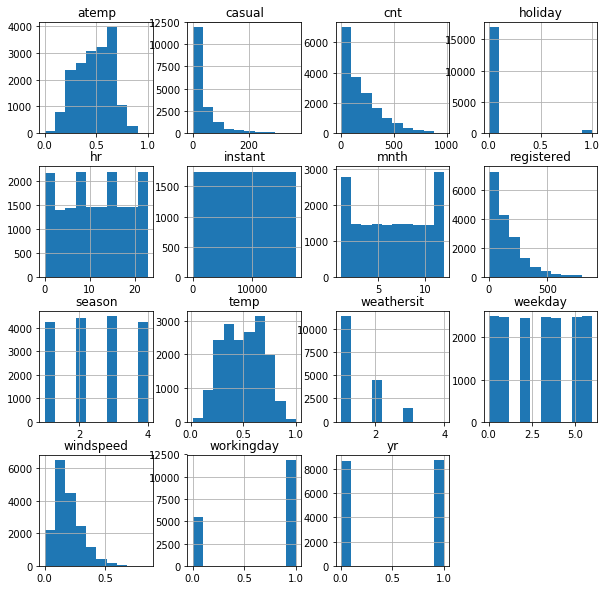

In [14]:

dataframe.hist(figsize=(10,10))

In [15]:
dataframe.nunique()
dataframe=dataframe.rename(columns={'cnt':'y'})

In [36]:
class Random_Forest_Regression:
    
    def __init__(self):
        self.trees = 300
        print("Random Forest Regression")
        
    def plotter(self,X,Y,reg,plot_title):
        # smoothening the plot so that we can see a smooth curve so getting points with difference 0.1
        X_smooth = np.arange(X.min(),X.max(),0.01)
        plt.title(plot_title)
        if reg != '':
            plt.plot(X_smooth,reg.predict(X_smooth.reshape(-1,1)),color='r')
        else:
#             Y_smooth = np.arange(Y.min(),Y.max(),0.01)
            plt.plot(X,Y,color='g')            
    
    def Random_Forest_Regression_demo(self,dataframe):
        # creating Linear regression object
        reg = RandomForestRegressor(n_estimators=self.trees,random_state=0)
        # creating decision regression object with random state =0 as if same function operated any where it'll give same resukt on the same set

        # Splitting independent variables and the output variables
        train_data = (dataframe.drop('y')).values
        train_Y = dataframe['y'].values
        # spilling train and test data
        train_data, test_data, train_Y, test_Y = train_test_split(train_data,train_Y, test_size=0.2,random_state=0)
        # geting the values of x till the degree provided
        
        reg.fit(train_data.reshape(-1,1),train_Y.reshape(-1,1))
        
        # predicting the values on basis of our input data
        Ypred = reg.predict(test_data.reshape(-1,1))
         
        print("The value for 6.5 is ", reg.predict(np.array(6.5).reshape(-1,1)))
        
         # error calculations
        mse = mean_squared_error(Ypred,test_Y)
        mae = mean_absolute_error(Ypred,test_Y)
        r_score = r2_score(Ypred,test_Y)
        accuracy = r_score*100
        print("Accuracy by r2 score is = {}".format(accuracy))
#         print("mae: {}, mse: {}, r2 score: {}".format(mae,mse,r_score))
        
        # plotting
        self.plotter(train_data,train_Y,reg,'train data vs predicted')
        self.plotter(test_data,test_Y,reg,'test data vs predicted')
    
    def learning_curve(self,algo,features,output,train_sizes,cv_val):
        train_sizes, train_scores,validation_scores = learning_curve(
            estimator=algo,
            X=features,
            y=output,
            train_sizes=train_sizes,
            cv=cv_val,
            scoring = 'neg_mean_squared_error'
        )
        print('Train scores: \n{}\n Validation scores: \n{}\n'.format(train_scores,validation_scores))
        train_mean= -np.mean(train_scores,axis=1)
        valid_mean= np.mean(validation_scores,axis=1)
#         print(train_mean,valid_mean)
        plt.plot(train_sizes,train_mean,label='training error curve',color='g')
        plt.legend()
        plt.show()
        plt.plot(train_sizes,valid_mean,label='validation error curve',color='r')
        plt.legend()
        plt.show()
        
    def cross_validation(dataframe):
        from sklearn.cross_validation import cross_validation
        
        
    def validation_Curve(self,algo,features,output,cv_val):
        param_range = np.logspace(-6,-1,cv_val)
        
        train_scores, test_scores = validation_curve(
        algo, param_name="max_depth", X=features,y=output
        ,param_range=param_range, cv=10, scoring="r2"
        )
        train_mean=np.mean(train_scores,axis=1)
        test_mean= np.mean(test_scores,axis=1)
        train_std =np.std(train_scores,axis=1)
        test_std =np.std(test_scores,axis=1)
        plt.ylim(0.0,0.2)

#         viz= validation_curve(
#         algo, param_name="max_depth", X=features,y=output
#         ,param_range=param_range, cv=10, scoring="r2"
#         )
        
        plt.title('validation curve for random forest')
        plt.semilogx(param_range, train_mean, label="Training score",
             color="darkorange", lw=2)
        plt.fill_between(param_range, train_mean - train_std,
                 train_mean + train_std, alpha=0.1,
                 color="darkorange", lw=2)
        plt.semilogx(param_range, train_mean, label="Validatgion score",
             color="g", lw=2)
        plt.fill_between(param_range, test_mean - train_std,
                 train_mean + train_std, alpha=0.1,
                 color='g', lw=2)
        plt.legend()
        plt.show()
    
    def main(self,dataframe):
        try:
            train_sizes = [1,50,100,200,500,2000,5000,7000,9000,12000,13000]
            self.Random_Forest_Regression_demo(dataframe)
            self.learning_curve(RandomForestRegressor(),dataframe.drop('y',axis=1),dataframe['y'],train_sizes,5)
            
            self.validation_Curve(DecisionTreeRegressor(),dataframe.drop('y',axis=1),dataframe['y'],5)
        except Exception as e:
            print("Process stopped because ",e)

# if __name__ == '__main__':
#     obj = Random_Forest_Regression()
#     obj.main(dataframe)

In [37]:
obj = Random_Forest_Regression()
train_sizes = [1,50,100,200,500,2000,5000,7000,9000,12000,13000]

Random Forest Regression


In [38]:
samp = dataframe['weekday']

Train scores: 
[[  -0.           -0.           -0.           -0.           -0.        ]
 [-284.5078       -7.3556      -10.2576      -15.3348      -18.579     ]
 [ -79.3847       -9.0491       -7.9846      -11.014       -12.2009    ]
 [ -48.2634       -5.8121       -6.25455      -4.8008       -4.6704    ]
 [ -17.51168      -2.39972      -1.81186      -2.14146      -2.43536   ]
 [  -6.258655     -2.030185     -2.463735     -2.57137      -2.30029   ]
 [  -3.10804      -2.432498     -2.39845      -1.925934     -2.389546  ]
 [  -3.23891714   -2.19053857   -2.72618429   -2.91679571   -2.23143714]
 [  -4.12483111   -3.61530889   -5.31458      -1.51244222   -1.71509556]
 [  -2.32490917   -2.46893917   -2.84180833   -2.45571333   -2.39259167]
 [  -2.73697385   -2.41610231   -2.38426769   -1.87261462   -2.45117769]]
 Validation scores: 
[[-6.09284658e+04 -5.12481821e+04 -3.25623300e+04 -1.08023467e+05
  -1.02797324e+05]
 [-1.27286003e+03 -2.90121517e+04 -1.88903532e+04 -7.67529362e+04
  -7.3187

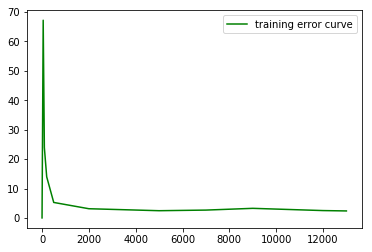

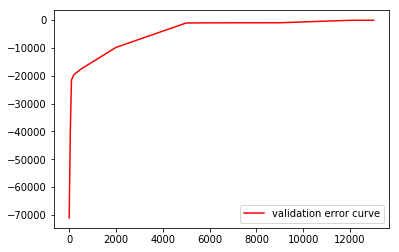

In [39]:
obj.learning_curve(RandomForestRegressor(),dataframe.drop('y',axis=1),dataframe['y'],train_sizes,5)

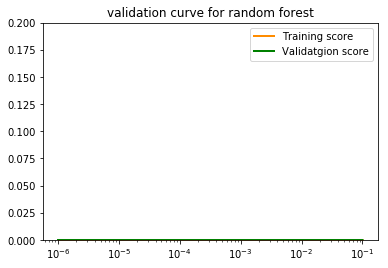

In [35]:
obj.validation_Curve(RandomForestRegressor(),dataframe.drop('y',axis=1),dataframe['y'],5)

In [30]:
# As we see the curve is converging it shows we have high bais and low variance
#importing libraries

import numpy as np
import pandas as pd
from matplotlib import cm

#loading the dataset
# dataset = pd.read_csv('dataset-4.csv')
#X = dataset.iloc[:,0:6].values

X = dataframe.drop('y',axis=1).values
y = dataframe['y'].values

#train/test
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1)

#fitting the classifier to the training set
regressor = LinearRegression()
regressor.fit(X_train, y_train)

# Then we create the CAP Curve with the following code :

# The ‘capcurve’ function that builds and shows the CAP curve is defined as follows :

from scipy import integrate
def capcurve(y_values, y_preds_proba):
    num_pos_obs = np.sum(y_values)
    num_count = y_values.shape[0]
    rate_pos_obs = np.divide(float(num_pos_obs) , float(num_count))
    ideal = pd.DataFrame({'x':[0,rate_pos_obs,1],'y':[0,1,1]})
    xx = np.divide(np.arange(num_count), float(num_count - 1))

    y_cap = np.c_[y_values,y_preds_proba]
    y_cap_df_s = pd.DataFrame(data=y_cap)
    y_cap_df_s = y_cap_df_s.sort_values([1],ascending=False).reset_index('index', drop=True)

    print(y_cap_df_s.head(20))

    yy = np.cumsum(np.divide(y_cap_df_s[0]),float(num_pos_obs))
    yy = np.append([0], yy[0:num_count-1]) #add the first curve point (0,0) : for xx=0 we have yy=0

    percent = 0.5
    row_index = np.trunc(np.multiply(num_count, percent))

    val_y1 = yy[row_index]
    val_y2 = yy[row_index+1]
    if val_y1 == val_y2:
        val = val_y1*1.0
    else:
        val_x1 = xx[row_index]
        val_x2 = xx[row_index+1]
    val = np.add(val_y1, np.divide(np.subtract(val_x2 , percent),np.subtract(val_x2, val_x1))*np.subtract(val_y2, val_y1))
    sigma_ideal = 1 * np.divide(xx[num_pos_obs - 1 ] ,2) + np.subtract(xx[num_count - 1], xx[num_pos_obs]) * 1
    sigma_model = integrate.simps(yy,xx)
    sigma_random = integrate.simps(xx,xx)

    ar_value = (sigma_model - sigma_random) / (sigma_ideal - sigma_random)
    #ar_label = 'ar value = %s' % ar_value

    fig, ax = plt.subplots(nrows = 1, ncols = 1)
    ax.plot(ideal['x'],ideal['y'], color='grey', label='Perfect Model')
    ax.plot(xx,yy, color='red', label='User Model')
    #ax.scatter(xx,yy, color='red')
    ax.plot(xx,xx, color='blue', label='Random Model')
    ax.plot([percent, percent], [0.0, val], color='green', linestyle='--', linewidth=1)
    ax.plot([0, percent], [val, val], color='green', linestyle='--', linewidth=1, label=str(val*100)+'% of positive obs at '+str(percent*100)+'%')

    plt.xlim(0, 1.02)
    plt.ylim(0, 1.25)
    plt.title("CAP Curve - a_r value ="+str(ar_value))
    plt.xlabel('% of the data')
    plt.ylabel('% of positive obs')
    plt.legend()
    plt.show()
    
y_pred = regressor.predict(X=X_test)
capcurve(y_test, y_pred)

KeyError: 'Level index must be same as name (None)'